# **CNN assignment**(Do read the note at the end)

Description: Here we are going to use CNN to classify images of elephants,tigers,cheetah's and crocodiles. Basically multiclass classificiation using CNN.

**Q.1** Import all required modules

In [2]:
#Your code here
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import zipfile
import io
import matplotlib.pyplot as plt




In [3]:
from google.colab import drive

drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Q.2** Load data using image_dataset_from_directory(https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image_dataset_from_directory)

In [8]:
import shutil
import os
'''
folder_path = '/content/sample_data/data/Cheetah'
shutil.rmtree(folder_path)

zip_file_name = '/content/sample_data/data/Croc.zip'
# Extract the contents
with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
    zip_ref.extractall('/content/sample_data/data')

'''

main_directory = '/content/drive/MyDrive/Colab Notebooks/data'
seed = 42
data=image_dataset_from_directory (
    main_directory,
    labels = 'inferred',
    label_mode ='categorical',
    class_names = ['Cheetah','Crocodile','Elephants','Tiger'],
    batch_size = 16,
    image_size = (256,256),
    shuffle = True,
    seed = seed,
    validation_split = 0,
    crop_to_aspect_ratio = True

)



Found 1678 files belonging to 4 classes.




*   Since data object is not iterable,we will create a nummpy iterator for data.
*   Then use batch to iterate through our data



In [9]:
data_iterator=data.as_numpy_iterator()

In [10]:
batch=data_iterator.next()


Run the below code and batch code 2-3 times to visualise the labels given to different animals.

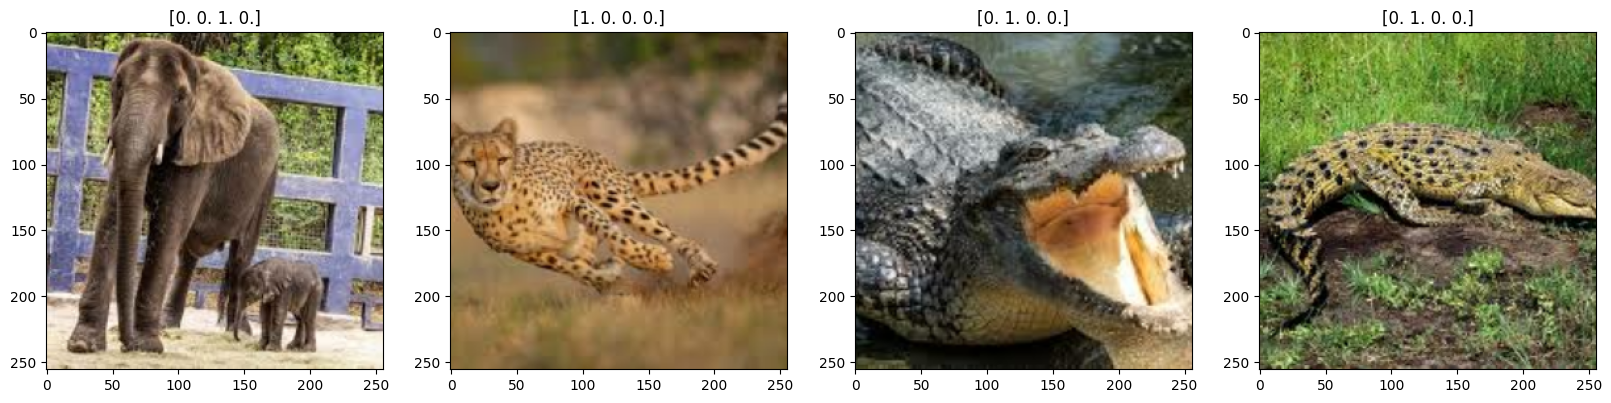

In [11]:
fig,ax=plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(str(batch[1][idx]))

**Q.3** Map the data such that all pixel values lie between 0 and 1 using the **lambda function**

In [12]:
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
scaler = Rescaling(1./255)
data=data.map(lambda x, y:(scaler(x), y))

**Q.4** Split the data into train set and test set(and validation set if needed) using **data.take**(https://www.geeksforgeeks.org/tensorflow-js-tf-data-dataset-class-take-method/) and **data.skip**(https://www.geeksforgeeks.org/tensorflow-js-tf-data-dataset-skip-method/)

In [13]:
#Your code here


train_size = int(0.80 * len(data))  # 80% for training
test_size = len(data) - train_size  # remaining for testing

# Shuffle the dataset
data = data.shuffle(buffer_size=len(data), seed=42)

# Split into training and testing datasets
train_data = data.take(train_size)
test_data = data.skip(train_size)


**Creating the model**

**Q.5** Write code to create CNN model including fully connected layers with softmax as final layer.

In [21]:

from tensorflow.keras.layers import Conv2D,Activation,BatchNormalization,MaxPooling2D,Dropout,Flatten,Dense
# Creating data augmentation pipeline
model = Sequential ([
    Conv2D(64,kernel_size = (3,3), activation = 'relu', input_shape = (256,256,3)),
    MaxPooling2D(pool_size = (2,2)),
    Dropout(0.05),
    Conv2D(128,kernel_size = (3,3), activation = 'relu'),
    MaxPooling2D(pool_size = (2,2)),
    Dropout(0.1),
    Conv2D(256,kernel_size = (3,3), activation = 'relu'),
    MaxPooling2D(pool_size = (2,2)),
    Dropout(0.05),
    Flatten(),
    Dense(1024,activation = 'relu'),
    Dense(256,activation = 'relu'),
    Dense(64,activation = 'relu'),
    Dense(4,activation = 'softmax')

]

)


**Q.6** Compile your model

In [22]:
# Compiling model
model.compile(optimizer = tf.keras.optimizers.RMSprop(0.0008), # 1e-4
              loss = 'categorical_crossentropy', # Ideal for multiclass tasks
              metrics = ['accuracy']) # Evaluation metric

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
early_stopping = EarlyStopping(monitor = 'val_accuracy',
                              patience = 5, mode = 'max',
                              restore_best_weights = True)
checkpoint = ModelCheckpoint('best_model.h5',
                            monitor = 'val_accuracy',
                            save_best_only = True)


**Q.7** Fit your model with train set and make sure to keep **less epochs**(10-15) as the dataset size is very large.

In [23]:
model.fit(train_data,
    validation_data=test_data,
    epochs=10,            # Number of epochs (iterations over the entire dataset)
    batch_size=8,        # Number of samples per gradient update
    callbacks=[early_stopping, checkpoint],  # List of callbacks to apply during training
    verbose=2 )

Epoch 1/10
84/84 - 145s - loss: 1.5720 - accuracy: 0.2876 - val_loss: 1.3190 - val_accuracy: 0.3810 - 145s/epoch - 2s/step
Epoch 2/10
84/84 - 46s - loss: 1.3499 - accuracy: 0.3757 - val_loss: 1.3022 - val_accuracy: 0.3214 - 46s/epoch - 549ms/step
Epoch 3/10
84/84 - 124s - loss: 1.2500 - accuracy: 0.4627 - val_loss: 1.1177 - val_accuracy: 0.5595 - 124s/epoch - 1s/step
Epoch 4/10
84/84 - 95s - loss: 1.1477 - accuracy: 0.5306 - val_loss: 0.9700 - val_accuracy: 0.6190 - 95s/epoch - 1s/step
Epoch 5/10
84/84 - 48s - loss: 1.0315 - accuracy: 0.5544 - val_loss: 1.0000 - val_accuracy: 0.5625 - 48s/epoch - 567ms/step
Epoch 6/10
84/84 - 85s - loss: 0.8748 - accuracy: 0.6617 - val_loss: 0.8424 - val_accuracy: 0.6845 - 85s/epoch - 1s/step
Epoch 7/10
84/84 - 40s - loss: 0.6901 - accuracy: 0.7407 - val_loss: 1.1829 - val_accuracy: 0.5419 - 40s/epoch - 473ms/step
Epoch 8/10
84/84 - 39s - loss: 0.4870 - accuracy: 0.8197 - val_loss: 1.0549 - val_accuracy: 0.6786 - 39s/epoch - 467ms/step
Epoch 9/10
84/84

**Q.8** Test your code with test set

In [24]:
loss,accuracy=model.evaluate(test_data,batch_size =16, verbose =2)

21/21 - 13s - loss: 0.1288 - accuracy: 0.9613 - 13s/epoch - 625ms/step


In [25]:
# Do not change this code
if accuracy>=0.85:
  print(f"Congratulations, CNN assignment complete!! Your accuracy is {accuracy}")
else:
  print(f"Try again, not enough accuracy! Your accuracy is {accuracy}" )

Congratulations, CNN assignment complete!! Your accuracy is 0.961309552192688


**Note: 1. Many of you will get very high train accuracy but low test accuracy. This is called overfitting, this can be solved by increasing the train set size. If your getting low accuracy for both train and test, modify your layers in the model.**

**2.Do use T4GPU.Ideally your first epoch will take quite sometime and rest of the epochs will be faster but if all your epochs are taking a lot of time, try starting a new gpu session(open a new gmail account and open colab on that) because your free gpu might have exhausted itself.**

**3.Other than that everything should be fine, happy learning!!**